In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import metrics

In [2]:
df= pd.read_csv('D:\\Property_Price_Train.csv')
df1 = pd.read_csv('D:\\Property_Price_Test.csv')

In [3]:
df = pd.concat([df1,df],axis=0)

In [4]:
df

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FVR,62.0,7500.000000,Paved,Paved,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000.0
1455,1456,60,RLD,62.0,7917.000000,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,1457,20,RLD,85.0,13175.000000,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,1458,70,RLD,66.0,9042.000000,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0


In [5]:
dfnew = df.drop('Sale_Price', axis=1)

In [6]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         2918 non-null   int64  
 1   Building_Class             2918 non-null   int64  
 2   Zoning_Class               2914 non-null   object 
 3   Lot_Extent                 2432 non-null   float64
 4   Lot_Size                   2918 non-null   float64
 5   Road_Type                  2918 non-null   object 
 6   Lane_Type                  198 non-null    object 
 7   Property_Shape             2918 non-null   object 
 8   Land_Outline               2918 non-null   object 
 9   Utility_Type               2916 non-null   object 
 10  Lot_Configuration          2918 non-null   object 
 11  Property_Slope             2918 non-null   object 
 12  Neighborhood               2918 non-null   object 
 13  Condition1                 2918 non-null   objec

In [7]:
a = dfnew.isnull().sum().sort_values(ascending=False)
a[a>0]

Pool_Quality                 2908
Miscellaneous_Feature        2813
Lane_Type                    2720
Fence_Quality                2347
Fireplace_Quality            1419
Lot_Extent                    486
Garage_Built_Year             159
Garage_Finish_Year            159
Garage_Quality                159
Garage_Condition              159
Garage                        157
Exposure_Level                 82
Basement_Condition             82
Basement_Height                81
BsmtFinType2                   80
BsmtFinType1                   79
Brick_Veneer_Type              24
Brick_Veneer_Area              23
Zoning_Class                    4
Functional_Rate                 2
Underground_Half_Bathroom       2
Underground_Full_Bathroom       2
Utility_Type                    2
Garage_Size                     1
Kitchen_Quality                 1
BsmtFinSF1                      1
Sale_Type                       1
BsmtFinSF2                      1
BsmtUnfSF                       1
Total_Basement

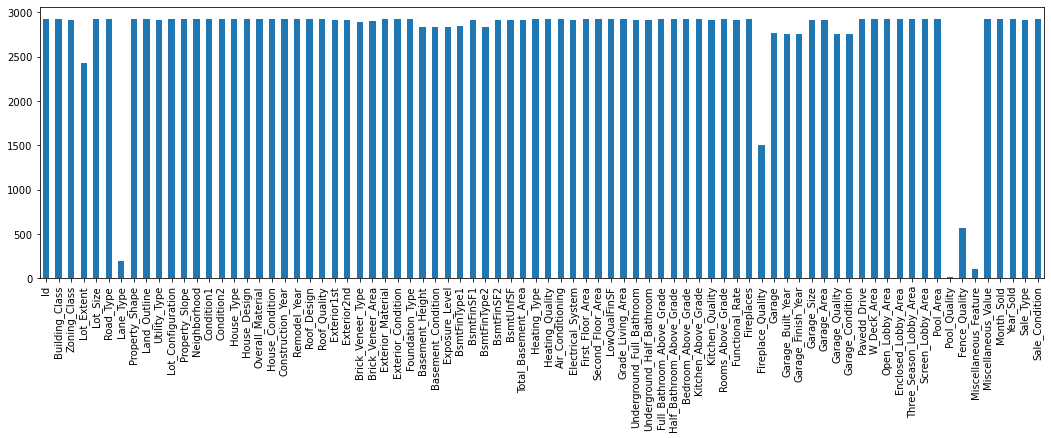

In [8]:
#Visualizing the null values in the data
plt.figure(figsize=(18,5))
dfnew.notnull().sum().plot(kind='bar');

In [9]:
dfnew.drop(['Pool_Quality', 'Miscellaneous_Feature', 'Lane_Type', 'Fence_Quality'], axis=1, inplace=True)

In [10]:
dfnew.describe()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,...,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold
count,2918.000000,2918.000000,2432.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2895.000000,2917.000000,...,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,1460.000000,57.150446,69.303454,10194.634957,6.089445,5.564428,1971.314942,1984.271076,102.236615,441.290024,...,471.851510,93.095222,48.062908,24.411772,2.603153,16.067855,2.252570,50.843386,6.213160,2007.792666
std,842.931492,42.519354,23.349420,7888.702911,1.410045,1.113292,30.296408,20.894880,179.355169,455.632103,...,213.846684,126.257764,68.167925,64.346881,25.192440,56.193208,35.670034,567.498680,2.715224,1.315184
min,1.000000,20.000000,21.000000,-4265.104479,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,-129.369350,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.250000,20.000000,59.000000,7134.500000,5.000000,5.000000,1953.250000,1965.000000,0.000000,0.000000,...,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9600.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,...,477.000000,75.123594,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.750000,70.000000,80.000000,12342.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,593.481992,173.183207,86.733331,50.325034,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
dfnew.drop(['Id', 'Pool_Area','Three_Season_Lobby_Area', 'Screen_Lobby_Area'], axis=1,inplace=True)

In [12]:
# divide data into categorical and numerical features
cat, num = [], []
for i in dfnew.columns:
    d = dfnew.dtypes[i]
    if d == 'float64' or d=='int64':
        num.append(i)
    else:
        cat.append(i)

print("Categorical: ", cat)
print("Numerical: ", num)

Categorical:  ['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition', 'Foundation_Type', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition']
Numerical:  ['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material', 'House_Condition', 'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area', 'Undergrou

In [13]:
for column in dfnew:
    if dfnew[column].isnull().any():
        if(column in cat):
            dfnew[column]=dfnew[column].fillna(dfnew[column].mode()[0])

In [14]:
a = dfnew.isnull().sum().sort_values(ascending=False)
a[a>0]

Lot_Extent                   486
Garage_Built_Year            159
Brick_Veneer_Area             23
Underground_Full_Bathroom      2
Underground_Half_Bathroom      2
Garage_Size                    1
Garage_Area                    1
Total_Basement_Area            1
BsmtFinSF1                     1
BsmtFinSF2                     1
BsmtUnfSF                      1
dtype: int64

In [15]:
dfnew['Garage_Built_Year'].replace(2207.0,2010.0, inplace=True)

In [16]:
dfnew['Brick_Veneer_Area'].fillna(dfnew['Brick_Veneer_Area'].mean(), inplace=True)
dfnew['Underground_Full_Bathroom'].fillna(dfnew['Underground_Full_Bathroom'].mean(), inplace=True)
dfnew['Underground_Half_Bathroom'].fillna(dfnew['Underground_Half_Bathroom'].mean(), inplace=True) #need to drop this and BsmtFinSF2 
dfnew['Garage_Size'].fillna(dfnew['Garage_Size'].mean(), inplace=True)
dfnew['Total_Basement_Area'].fillna(dfnew['Total_Basement_Area'].mean(), inplace=True)
dfnew['BsmtUnfSF'].fillna(dfnew['BsmtUnfSF'].mean(), inplace=True)
dfnew['BsmtFinSF1'].fillna(dfnew['BsmtFinSF1'].mean(), inplace=True)
dfnew['Garage_Area'].fillna(dfnew['Garage_Area'].mean(), inplace=True)

In [17]:
dfnew['Garage_Built_Year'].fillna(dfnew['Garage_Built_Year'].mode()[0], inplace=True)

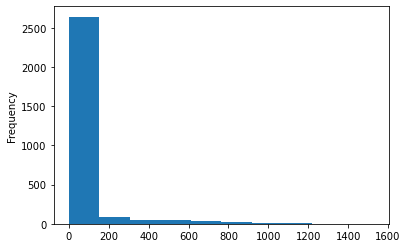

In [18]:
dfnew['BsmtFinSF2'].plot(kind='hist');

In [19]:
dfnew['Lot_Extent'].fillna(dfnew['Lot_Extent'].median(), inplace=True)

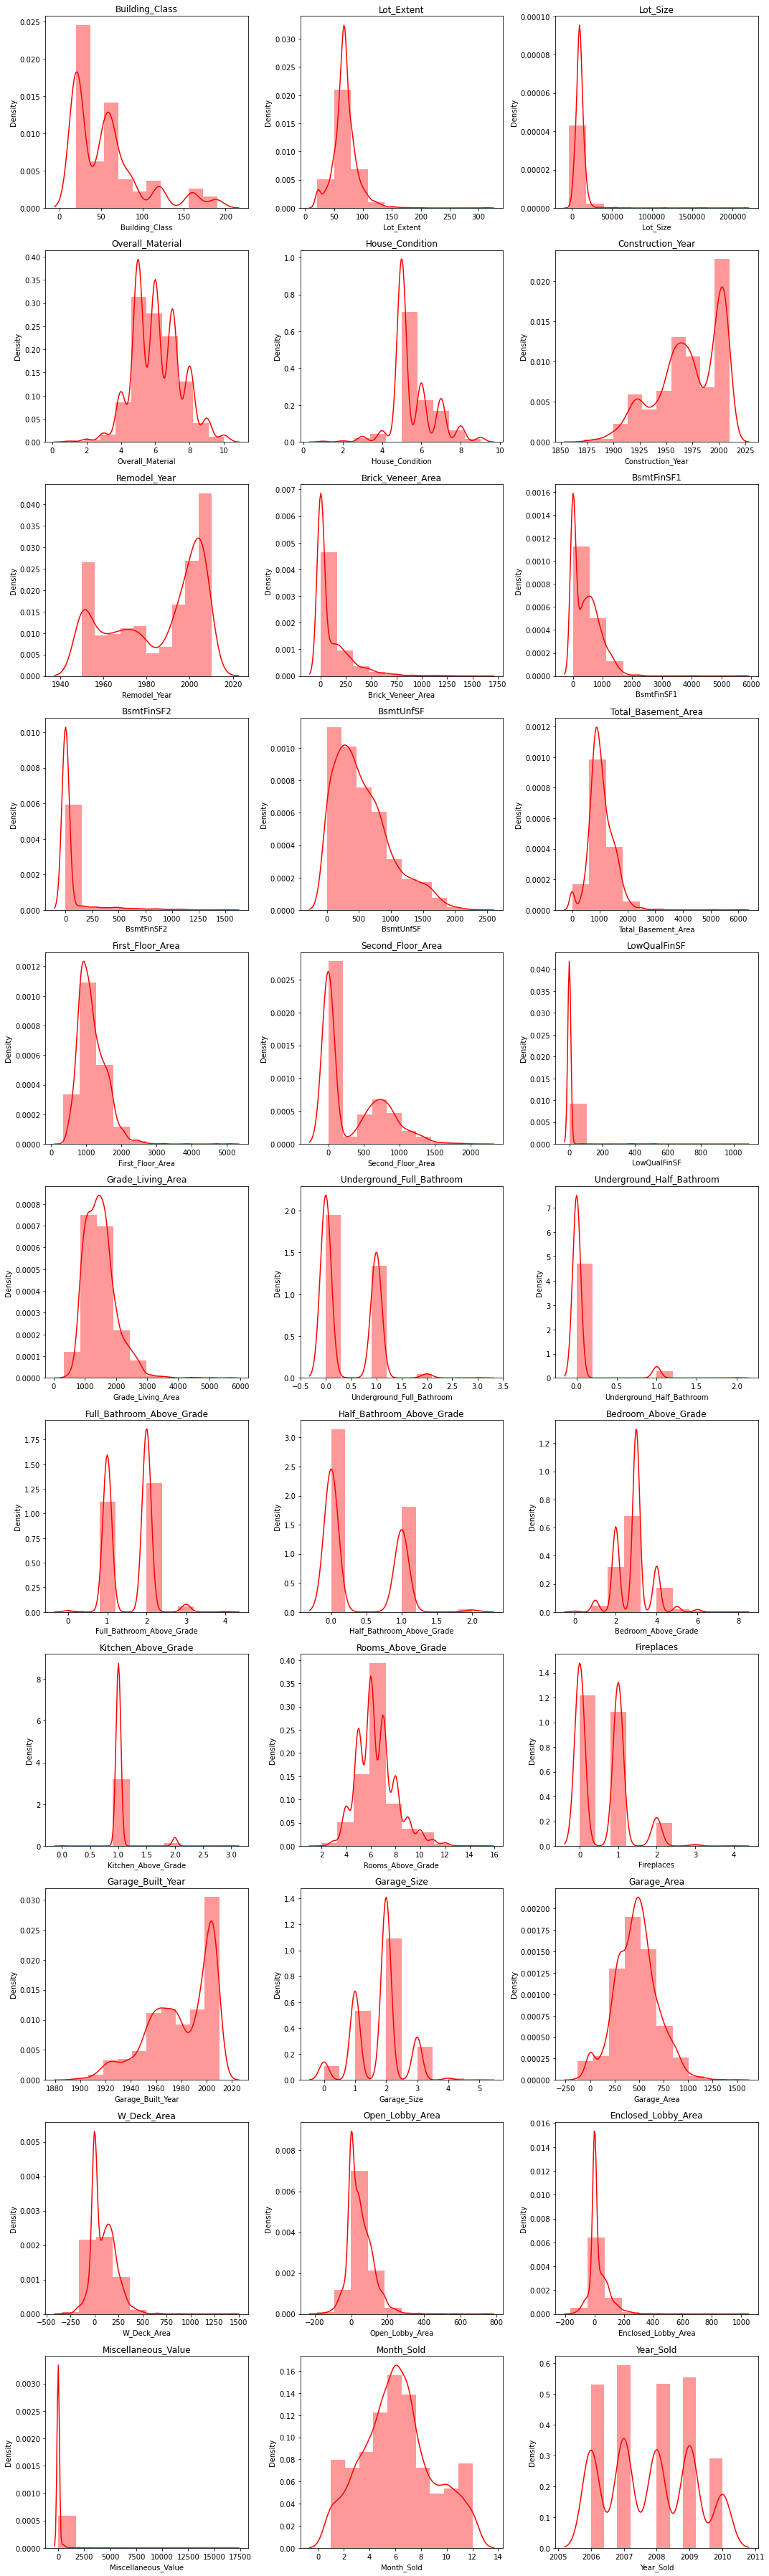

In [20]:
plt.figure(figsize=(15,50))
for i, variable in enumerate(num):
                     plt.subplot(11,3,i+1)
                       
                     sns.distplot(dfnew[variable],kde=True,color='r', bins=10)
                     plt.tight_layout()
                     plt.title(variable)

In [21]:
for i in num:
    print(dfnew[i].value_counts().sort_values(ascending=False))
    print("*"*40)
    
    

20     1078
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: Building_Class, dtype: int64
****************************************
68.0     530
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
133.0      1
119.0      1
195.0      1
200.0      1
31.0       1
Name: Lot_Extent, Length: 128, dtype: int64
****************************************
7200.000000     25
9600.000000     24
6000.000000     17
8400.000000     14
9000.000000     14
                ..
2527.540048      1
8963.227728      1
10791.303040     1
16607.367200     1
6239.848986      1
Name: Lot_Size, Length: 2532, dtype: int64
****************************************
5     824
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: Overall_Material, dtype: int64
****************************************
5    1645
6     530
7     390
8  

Columns: \
Underground half bathroom\
Miscellaneous_Values\
LowQualFinSF\
BsmtFinSF2\
Kitchen_Above_Grade have high repeating values therefore dropping them

In [22]:
dfnew.drop(['Underground_Half_Bathroom', 'Miscellaneous_Value', 'LowQualFinSF', 'BsmtFinSF2', 'Kitchen_Above_Grade'], axis=1, inplace=True)

In [23]:
def set_caping(df, column, capping):
   
    mean = df[column].mean() # Mean of the column
    std = df[column].std() # Standard Deviation of the column
   
    UCL = mean + (3 * std)
    LCL = mean - (3 * std)
    if capping == "both":
        df[column] = np.where((df[column] > UCL), UCL , df[column])
        df[column] = np.where((df[column] < LCL), LCL , df[column])
       
    elif capping == "upper":
        df[column] = np.where((df[column] > UCL), UCL , df[column])
       
    elif capping == "lower":
        df[column] = np.where((df[column] < LCL), LCL ,df[column])
    else:
        print("Please enter proper value of capping parameter. \n Possible values:\tboth\tupper\tlower")

<AxesSubplot:ylabel='Frequency'>

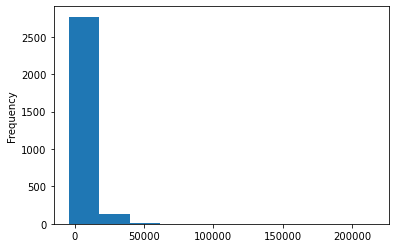

In [24]:
dfnew['Lot_Size'].plot(kind='hist')

In [25]:
dfnew['Lot_Size'] = np.log(dfnew['Lot_Size']+1)

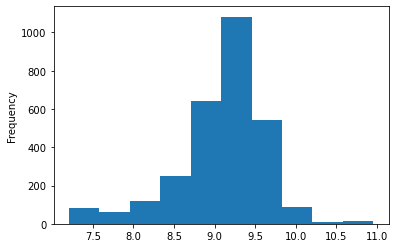

In [26]:
set_caping( dfnew, 'Lot_Size', 'both')
dfnew['Lot_Size'].plot(kind='hist');

In [27]:
dfnew['Lot_Size'].describe()
#need to figure out a way to replace negative values as lot size cannot be negative

count    2891.000000
mean        9.091384
std         0.556005
min         7.205999
25%         8.881975
50%         9.169623
75%         9.423851
max        10.954599
Name: Lot_Size, dtype: float64

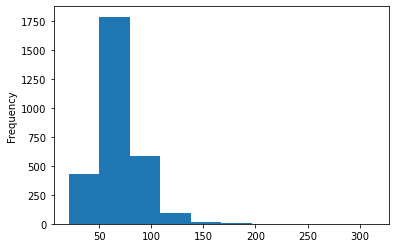

In [28]:
dfnew['Lot_Extent'].plot(kind='hist');

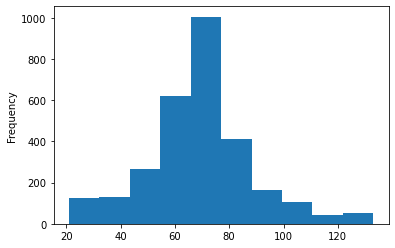

In [29]:
set_caping( dfnew, 'Lot_Extent', 'upper')
dfnew['Lot_Extent'].plot(kind='hist');

In [30]:
dfnew['Lot_Extent'].describe()

count    2918.000000
mean       68.773974
std        19.632117
min        21.000000
25%        60.000000
50%        68.000000
75%        78.000000
max       133.050173
Name: Lot_Extent, dtype: float64

<AxesSubplot:ylabel='Frequency'>

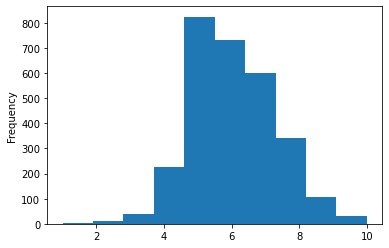

In [31]:
dfnew['Overall_Material'].plot(kind='hist')
                               #seems like normally distributed

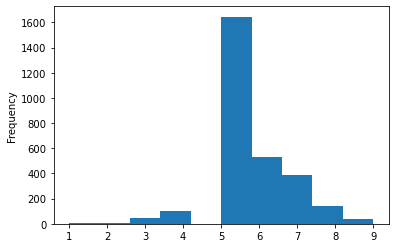

In [32]:
dfnew['House_Condition'].plot(kind='hist');

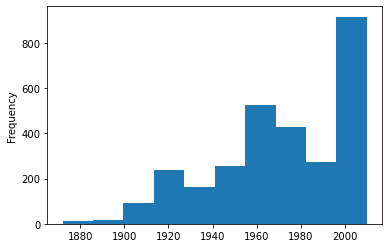

In [33]:
dfnew['Construction_Year'].plot(kind='hist', ); #will derive age of the house from this column

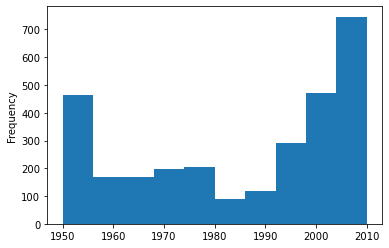

In [34]:
dfnew['Remodel_Year'].plot(kind='hist', );

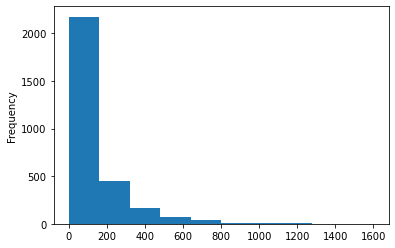

In [35]:
dfnew['Brick_Veneer_Area'].plot(kind='hist');

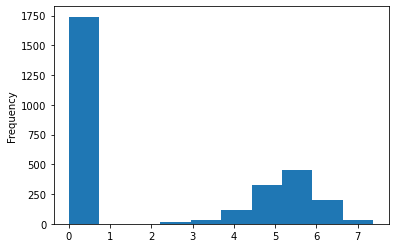

In [36]:
dfnew['Brick_Veneer_Area'] = np.log(dfnew['Brick_Veneer_Area']+1)
dfnew['Brick_Veneer_Area'].plot(kind='hist');

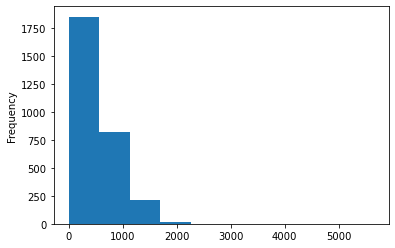

In [37]:
dfnew['BsmtFinSF1'].plot(kind='hist', );

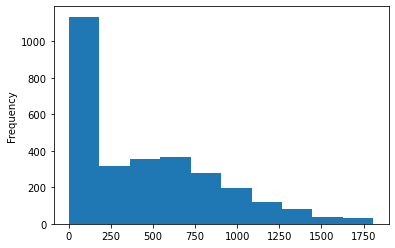

In [38]:
set_caping( dfnew, 'BsmtFinSF1', 'upper')
dfnew['BsmtFinSF1'].plot(kind='hist', );

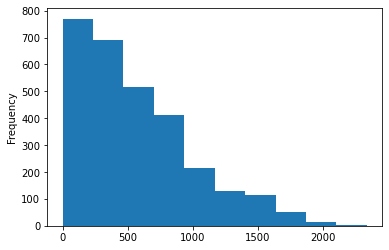

In [39]:
dfnew['BsmtUnfSF'].plot(kind='hist');

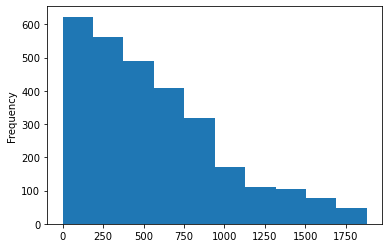

In [40]:
set_caping( dfnew, 'BsmtUnfSF', 'upper')
dfnew['BsmtUnfSF'].plot(kind='hist');

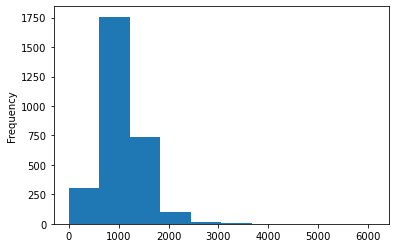

In [41]:
dfnew['Total_Basement_Area'].plot(kind='hist');

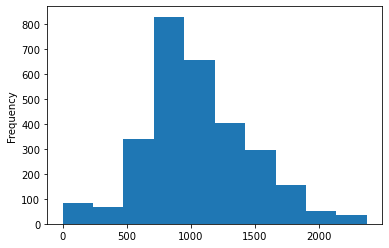

In [42]:
set_caping( dfnew, 'Total_Basement_Area', 'upper')
dfnew['Total_Basement_Area'].plot(kind='hist');

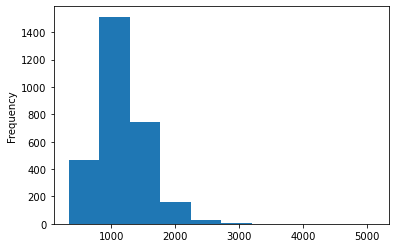

In [43]:
dfnew['First_Floor_Area'].plot(kind='hist');

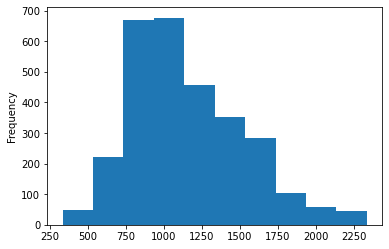

In [44]:
set_caping( dfnew, 'First_Floor_Area', 'upper')
dfnew['First_Floor_Area'].plot(kind='hist');

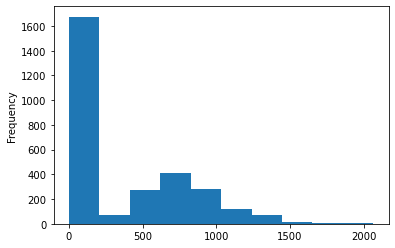

In [45]:
dfnew['Second_Floor_Area'].plot(kind='hist');

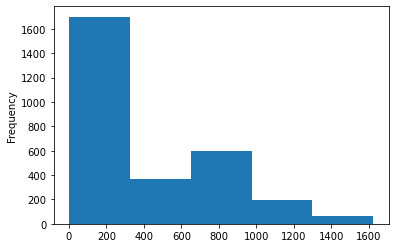

In [46]:
set_caping( dfnew, 'Second_Floor_Area', 'upper')
dfnew['Second_Floor_Area'].plot(kind='hist', bins=5);

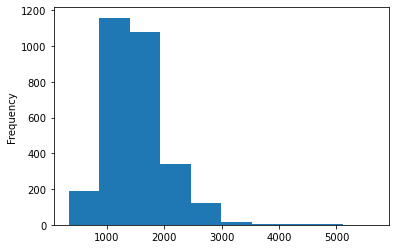

In [47]:
dfnew['Grade_Living_Area'].plot(kind='hist');

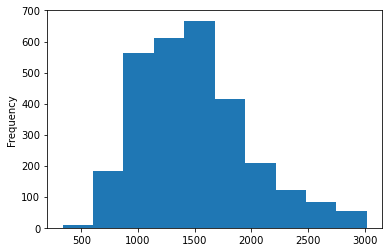

In [48]:
set_caping( dfnew, 'Grade_Living_Area', 'upper')
dfnew['Grade_Living_Area'].plot(kind='hist');

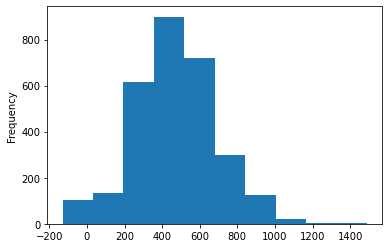

In [49]:
dfnew['Garage_Area'].plot(kind='hist');

In [50]:
dfnew['Garage_Area'][dfnew['Garage_Area']<0]=0

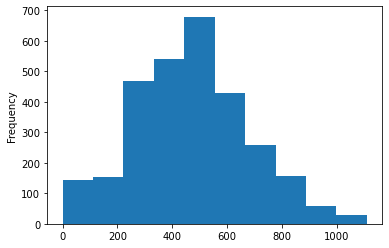

In [51]:
set_caping( dfnew, 'Garage_Area', 'upper')
dfnew['Garage_Area'].plot(kind='hist');

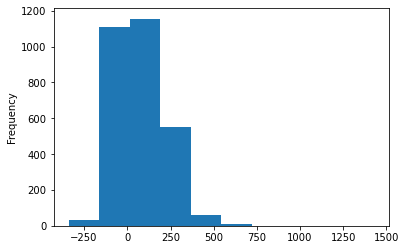

In [52]:
dfnew['W_Deck_Area'].plot(kind='hist');

In [53]:
dfnew['W_Deck_Area'][dfnew['W_Deck_Area']<0]= abs(dfnew['W_Deck_Area'])

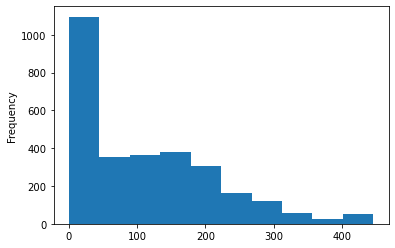

In [54]:
set_caping( dfnew, 'W_Deck_Area', 'upper')
dfnew['W_Deck_Area'].plot(kind='hist');

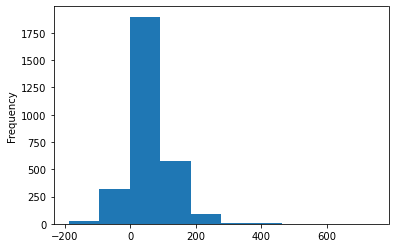

In [55]:
dfnew['Open_Lobby_Area'].plot(kind='hist');

In [56]:
dfnew['Open_Lobby_Area'][dfnew['Open_Lobby_Area']<0]= abs(dfnew['Open_Lobby_Area'])

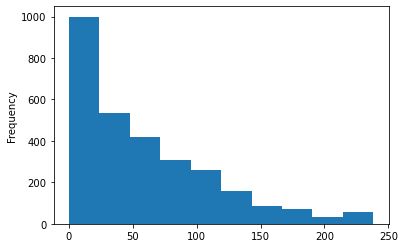

In [57]:
set_caping( dfnew, 'Open_Lobby_Area', 'upper')
dfnew['Open_Lobby_Area'].plot(kind='hist');

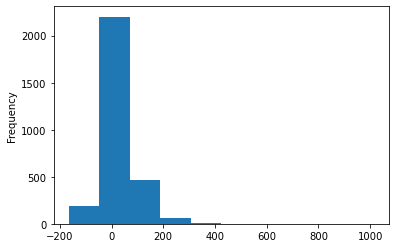

In [58]:
dfnew['Enclosed_Lobby_Area'].plot(kind='hist');

In [59]:
dfnew['Enclosed_Lobby_Area'][dfnew['Enclosed_Lobby_Area']<0]= abs(dfnew['Enclosed_Lobby_Area'])

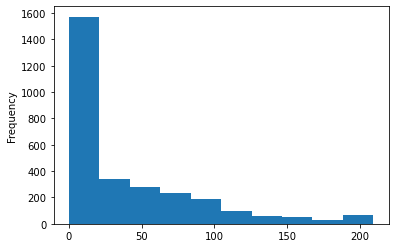

In [60]:
set_caping( dfnew, 'Enclosed_Lobby_Area', 'upper')
dfnew['Enclosed_Lobby_Area'].plot(kind='hist');

In [61]:
# divide data into categorical and numerical features
cat, num = [], []
for i in dfnew.columns:
    d = dfnew.dtypes[i]
    if d == 'float64' or d=='int64':
        num.append(i)
    else:
        cat.append(i)

print("Categorical: ", cat)
print("Numerical: ", num)

Categorical:  ['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition', 'Foundation_Type', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition']
Numerical:  ['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material', 'House_Condition', 'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom', 'Full_Bathr

In [62]:
from scipy import stats

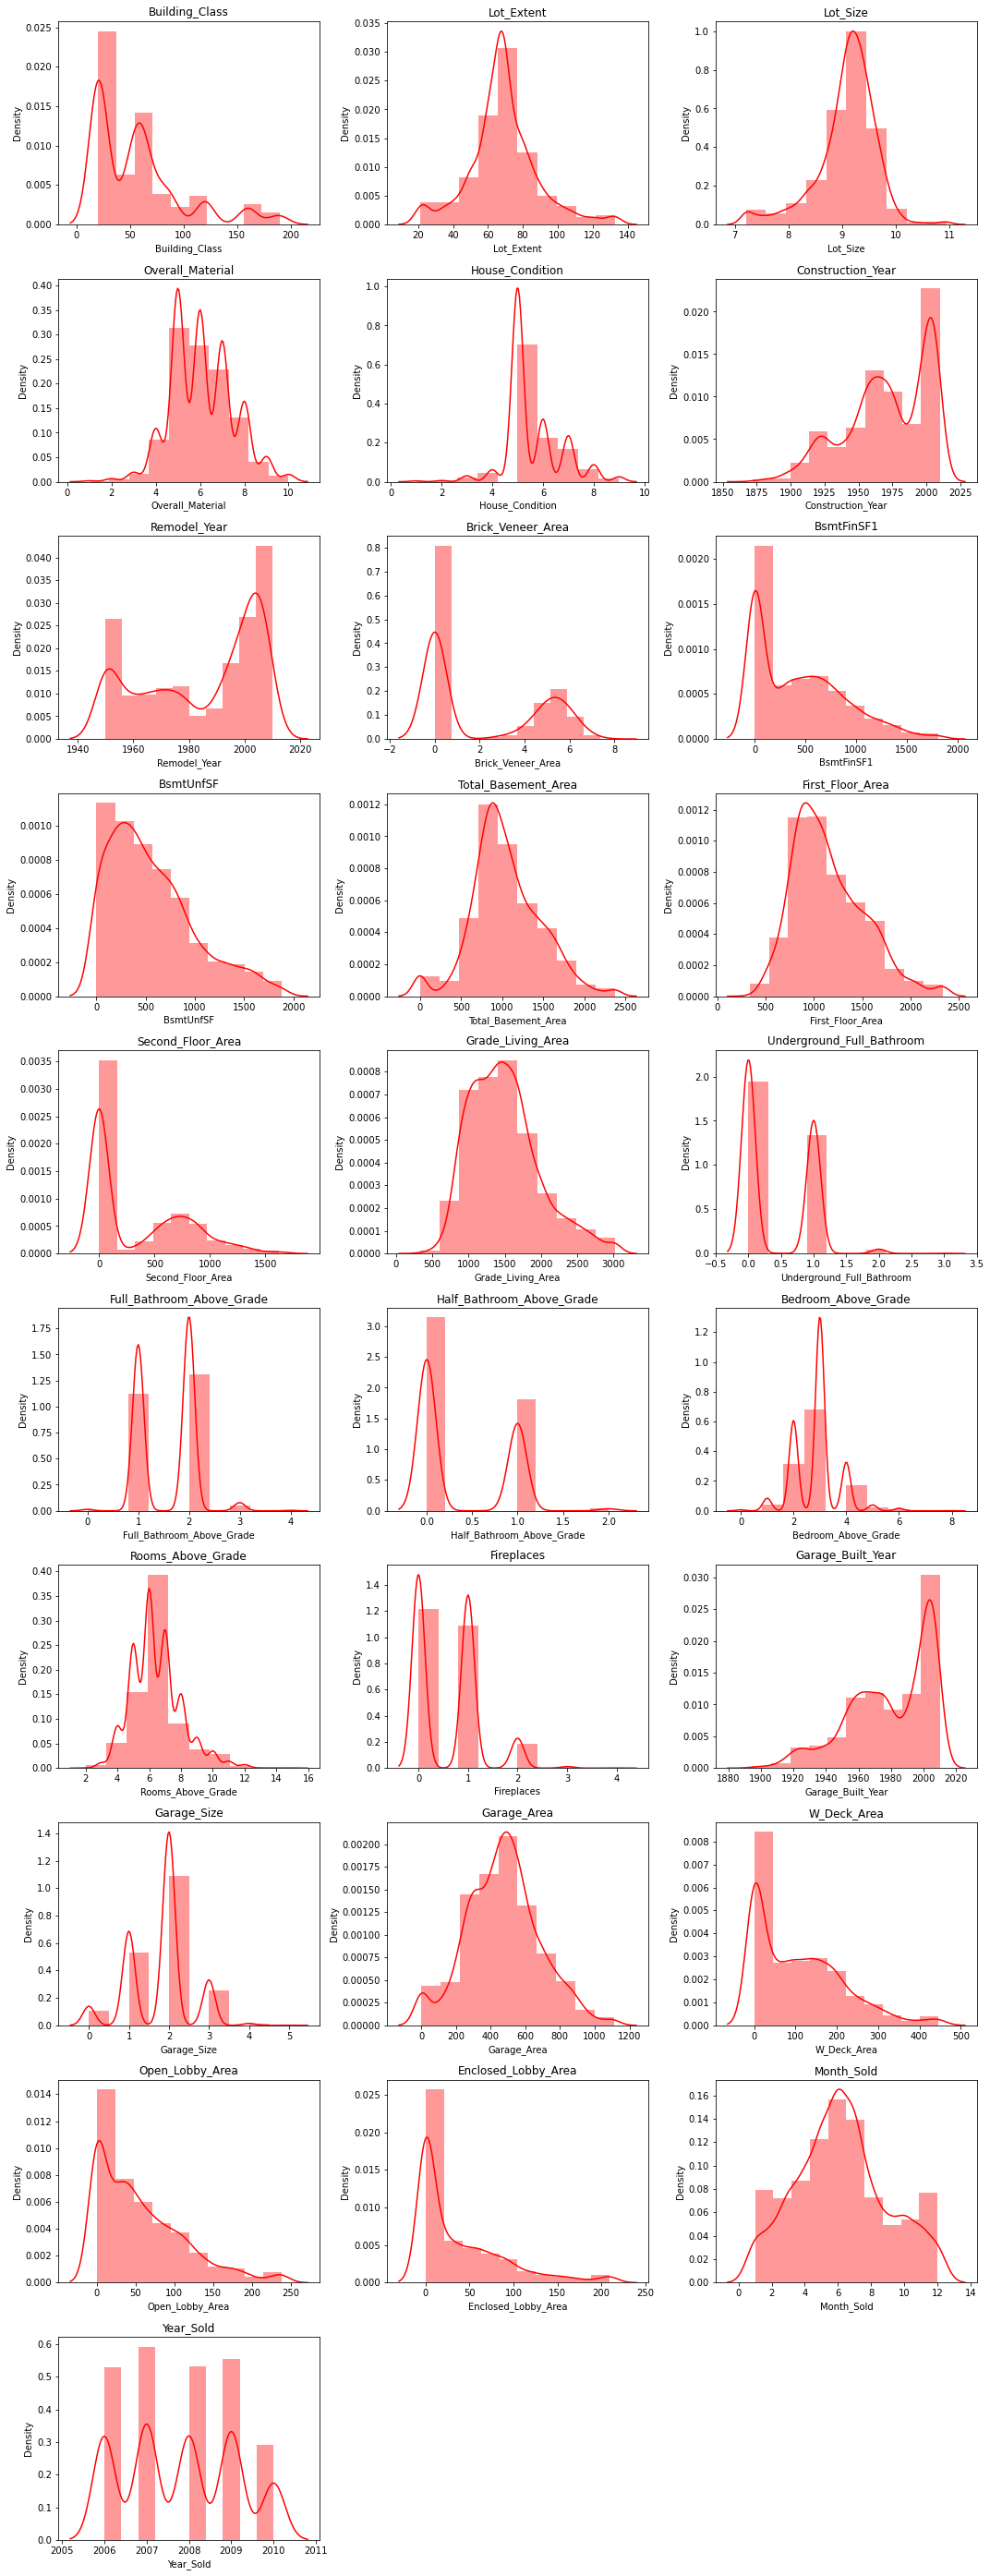

In [63]:
plt.figure(figsize=(15,50))
for i, variable in enumerate(num):
                     plt.subplot(13,3,i+1)
                       
                     sns.distplot(dfnew[variable],kde=True,color='r', bins=10)
                     plt.tight_layout()
                     plt.title(variable)

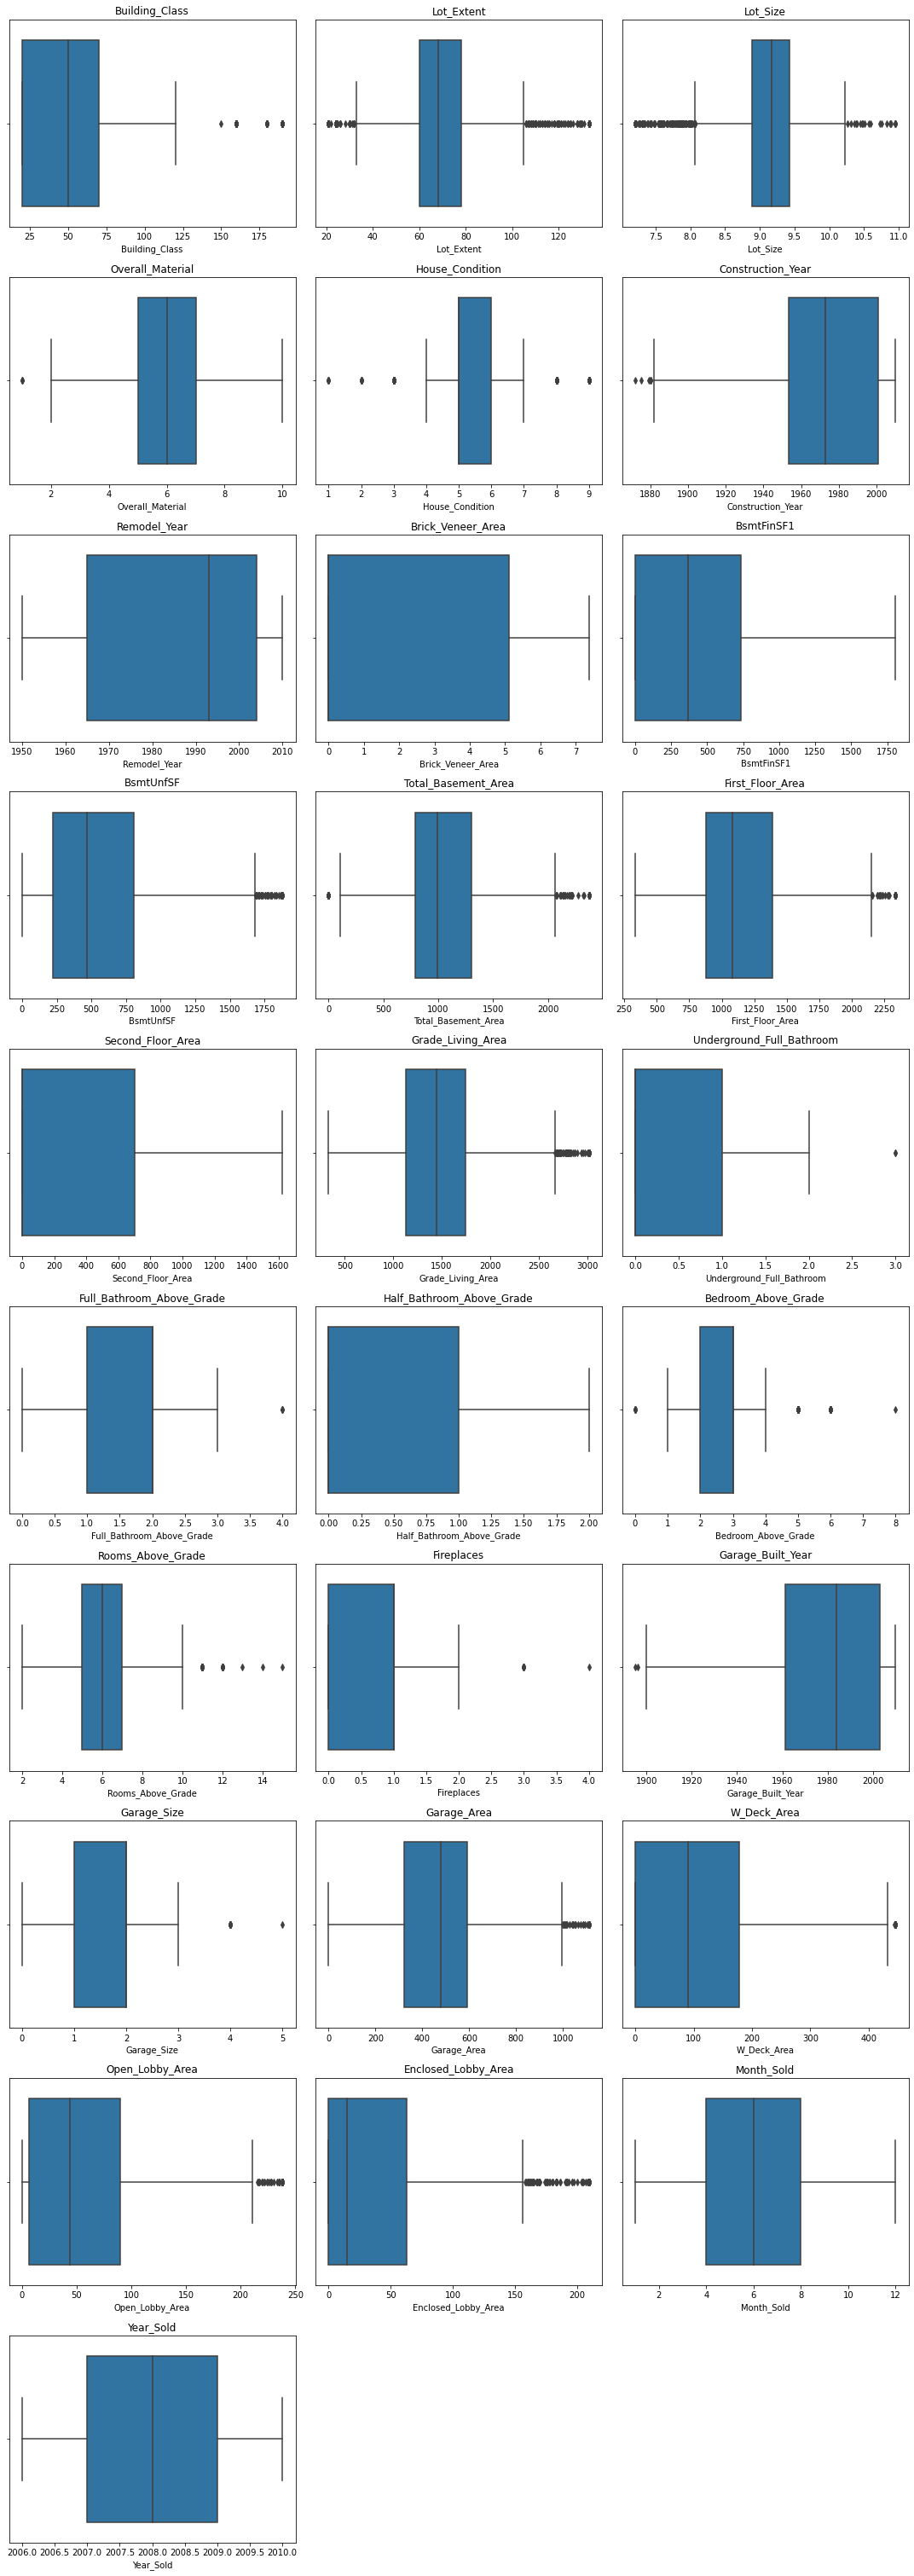

In [64]:
plt.figure(figsize=(15,50))
for i, variable in enumerate(num):
                     plt.subplot(12,3,i+1)
                       
                     sns.boxplot(dfnew[variable])
                     plt.tight_layout()
                     plt.title(variable)

# Categorical Features

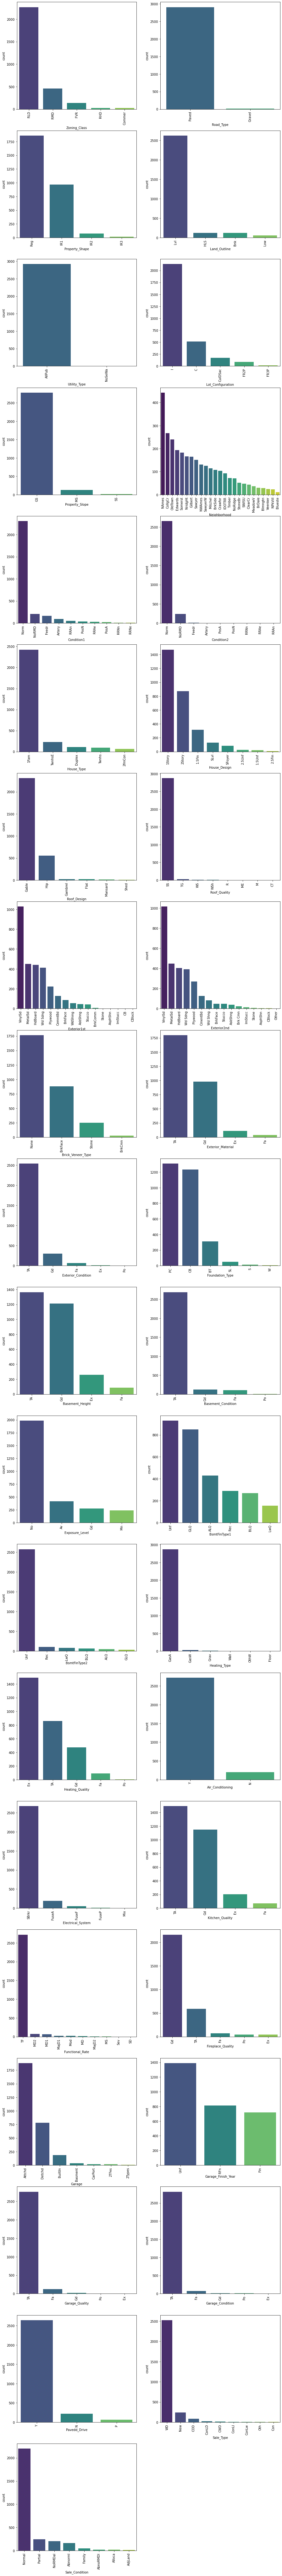

In [65]:
plt.figure(figsize=(15,300))

for i, cols in enumerate(cat):
                     plt.subplot(40,2,i+1)
                     order = dfnew[cols].value_counts(ascending=False).index    
                     ax=sns.countplot(x=dfnew[cols], data=dfnew , order=order ,palette='viridis')
                     plt.xticks(rotation=90)
                     plt.tight_layout

Zoning class looks like a good predictor of price and there is low overlap between the price.\
Road type has just 12 samples for Gravel so it cannot be used.\
Property shape alos has significant overlap thus cannot be used as a predictor.\
Land outline can be used as a predictor.\
Utility type cannot be ised as a predictor.\
Lot Configuration also shas signficant overlap therefore cannot be used.\
Property slope also has overlap cannot be used.\
Neighbourhood looks like a good predictor of price.\
Brick veneer type and exterior material look like a good predictor of price.\
Basement height, basement condition and exposure level look like possible predictor of price.\
Air condition and kitchen quality look like good predictor of price.\
Garage finish year looks like a possible predictor of price.

In [66]:
for i in cat:
    print(dfnew[i].value_counts().sort_values(ascending=False))
    print("*"*40)

RLD       2268
RMD        460
FVR        139
RHD         26
Commer      25
Name: Zoning_Class, dtype: int64
****************************************
Paved     2906
Gravel      12
Name: Road_Type, dtype: int64
****************************************
Reg    1858
IR1     968
IR2      76
IR3      16
Name: Property_Shape, dtype: int64
****************************************
Lvl    2621
HLS     120
Bnk     117
Low      60
Name: Land_Outline, dtype: int64
****************************************
AllPub    2917
NoSeWa       1
Name: Utility_Type, dtype: int64
****************************************
I          2132
C           511
CulDSac     176
FR2P         85
FR3P         14
Name: Lot_Configuration, dtype: int64
****************************************
GS    2777
MS     125
SS      16
Name: Property_Slope, dtype: int64
****************************************
NAmes      443
CollgCr    267
OldTown    239
Edwards    193
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     1

In [67]:
dfnew.shape

(2918, 67)

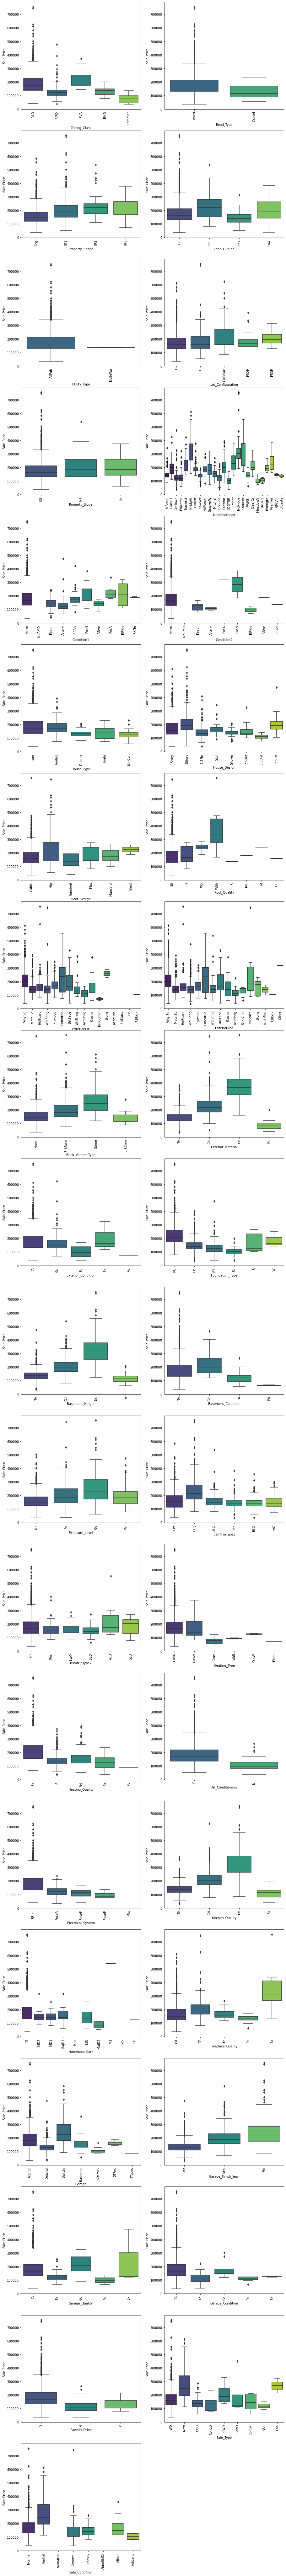

In [68]:
plt.figure(figsize=(15,300))

for i, cols in enumerate(cat):
                     plt.subplot(40,2,i+1)
                     order = dfnew[cols].value_counts(ascending=False).index    
                     ax=sns.boxplot(x=dfnew[cols], y=df['Sale_Price'], data=dfnew , order=order ,palette='viridis')
                     plt.xticks(rotation=90)
                     plt.tight_layout

In [69]:
target = df['Sale_Price'].reset_index()

In [70]:
target = target.iloc[:,1:]

In [71]:
dfnew.reset_index(inplace=True)

In [72]:
df_new = dfnew.iloc[:,1:]

In [73]:
final_set = df_new.join(target)

In [74]:
final_test = final_set.iloc[:1459,:]
final_train = final_set.iloc[1459:,:]

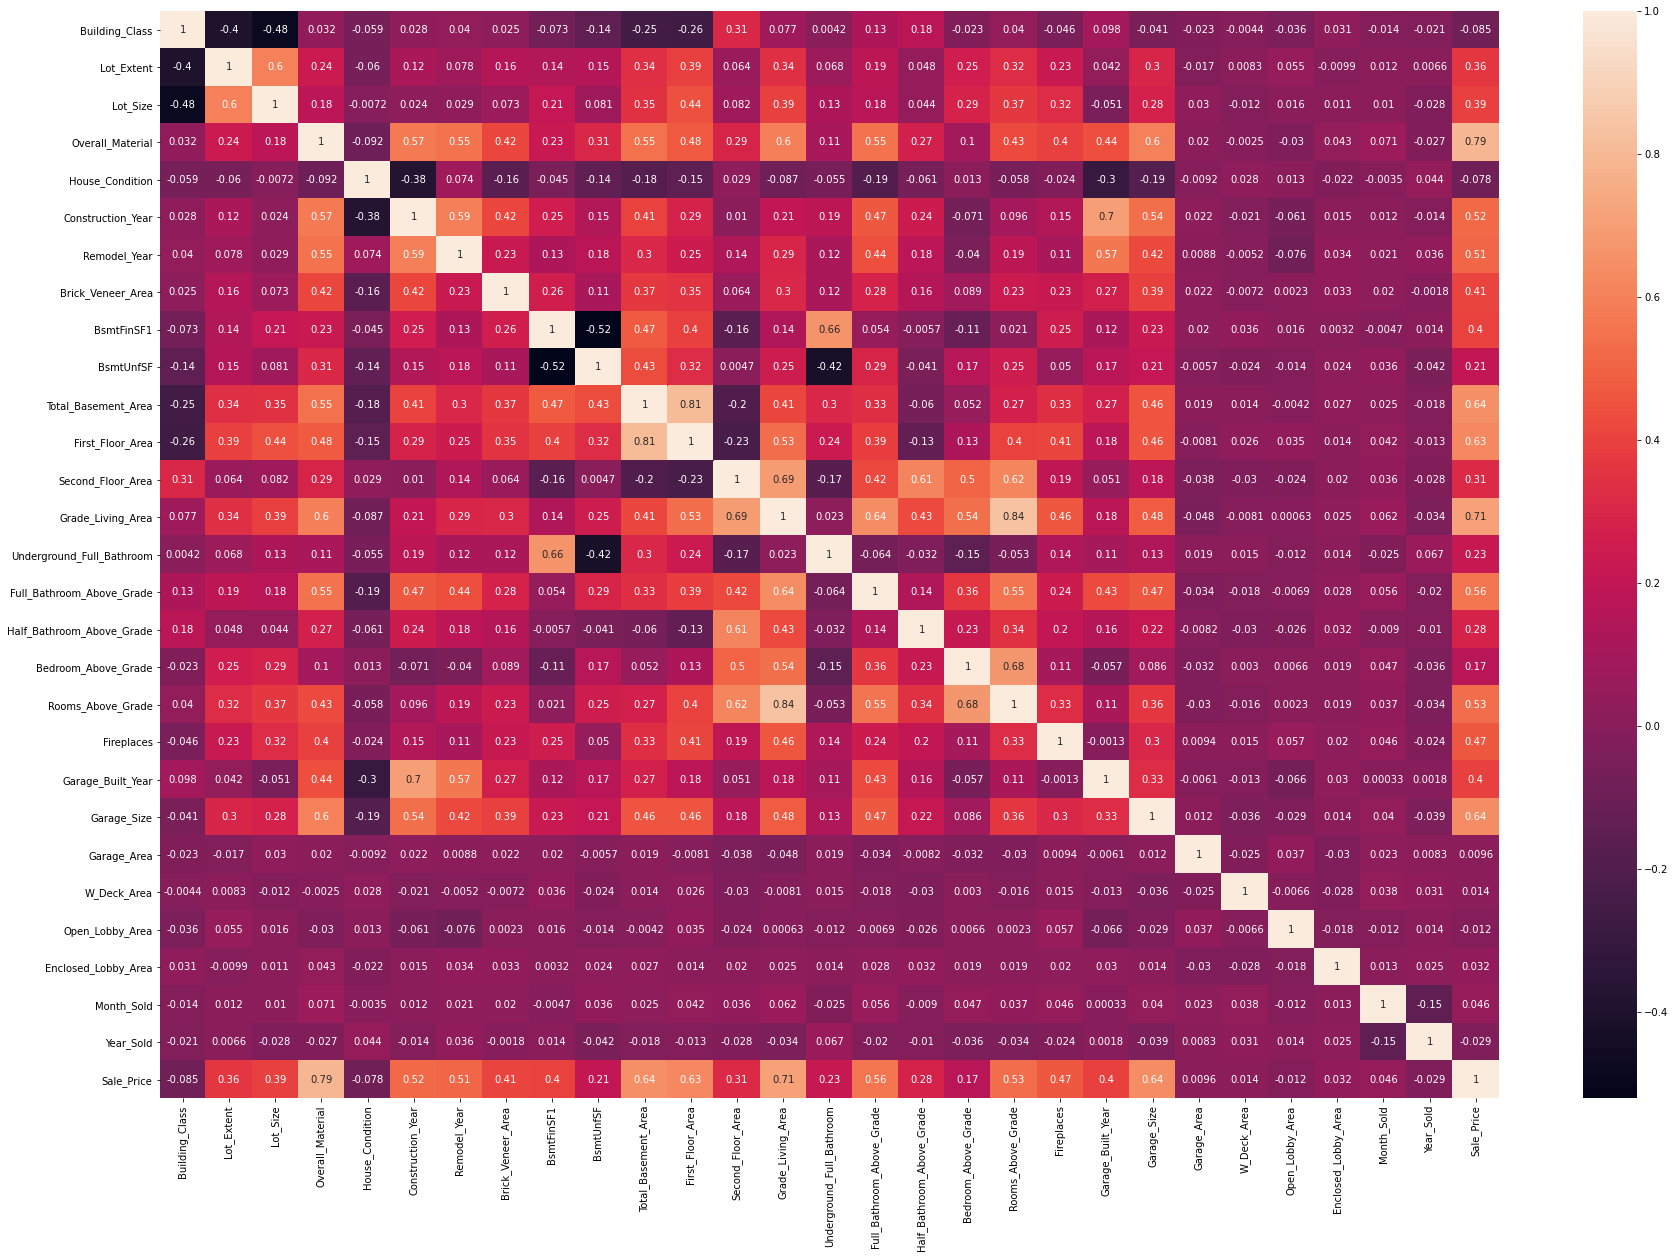

In [75]:
plt.figure(figsize=(30,20))
sns.heatmap(final_train.corr(), annot=True);

In [76]:
final_train.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Road_Type',
       'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration',
       'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2',
       'House_Type', 'House_Design', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'Roof_Design', 'Roof_Quality',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grad

In [77]:
# divide data into categorical and numerical features
cat, num = [], []
for i in final_train.columns:
    d = final_train.dtypes[i]
    if d == 'float64' or d=='int64':
        num.append(i)
    else:
        cat.append(i)

print("Categorical: ", cat)
print("Numerical: ", num)

Categorical:  ['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition', 'Foundation_Type', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality', 'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition']
Numerical:  ['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material', 'House_Condition', 'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom', 'Full_Bathr

In [78]:
X = final_train[['Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Land_Outline', 'Neighborhood', 'Overall_Material', 
            'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Basement_Height', 'Basement_Condition', 'Exposure_Level',
      'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'Air_Conditioning', 'First_Floor_Area',
       'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grade', 'Fireplaces', 'Garage',
       'Garage_Built_Year', 'Garage_Finish_Year', 'Garage_Size', 'Sale_Condition']]
y = final_train['Sale_Price']

In [79]:
X.head()

,Zoning_Class,Lot_Extent,Lot_Size,Land_Outline,Neighborhood,Overall_Material,Construction_Year,Remodel_Year,Brick_Veneer_Type,Brick_Veneer_Area,...,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Sale_Condition
1459,RLD,65.0,9.042040,Lvl,CollgCr,7,2003,2003,BrkFace,5.283204,...,1,3,Gd,8,0,Attchd,2003.0,RFn,2.0,Normal
1460,RLD,80.0,9.169623,Lvl,Veenker,6,1976,1976,None,0.000000,...,0,3,TA,6,1,Attchd,1976.0,RFn,2.0,Normal
1461,RLD,68.0,9.328212,Lvl,CollgCr,7,2001,2002,BrkFace,5.093750,...,1,3,Gd,6,1,Attchd,2001.0,RFn,2.0,Normal
1462,RLD,60.0,9.164401,Lvl,Crawfor,7,1915,1970,None,0.000000,...,0,3,Gd,7,1,Detchd,1998.0,Unf,3.0,Abnorml
1463,RLD,84.0,9.565284,Lvl,NoRidge,8,2000,2000,BrkFace,5.860786,...,1,4,Gd,9,1,Attchd,2000.0,RFn,3.0,Normal


In [80]:
X['Age'] = 2021 - X['Construction_Year']
X['Years_After_Remodelling'] = 2021 - X['Remodel_Year']
X['Garage_Age'] = 2021 - X['Garage_Built_Year']

In [81]:
X.drop(['Construction_Year','Remodel_Year', 'Garage_Built_Year'],axis=1, inplace=True)

In [82]:
# divide data into categorical and numerical features
cat, num = [], []
for i in X.columns:
    d = X.dtypes[i]
    if d == 'float64' or d=='int64':
        num.append(i)
    else:
        cat.append(i)

print("Categorical: ", cat)
print("Numerical: ", num)

Categorical:  ['Zoning_Class', 'Land_Outline', 'Neighborhood', 'Brick_Veneer_Type', 'Exterior_Material', 'Basement_Height', 'Basement_Condition', 'Exposure_Level', 'Air_Conditioning', 'Kitchen_Quality', 'Garage', 'Garage_Finish_Year', 'Sale_Condition']
Numerical:  ['Lot_Extent', 'Lot_Size', 'Overall_Material', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area', 'Grade_Living_Area', 'Underground_Full_Bathroom', 'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces', 'Garage_Size', 'Age', 'Years_After_Remodelling', 'Garage_Age']


In [83]:
pvalue = []
pearson_coeff = []

In [84]:
for i in num:
    pearson_coef, p_value = stats.pearsonr(X[i], y)
    pearson_coeff.append(pearson_coef)
    pvalue.append(p_value)

In [85]:
col = pd.DataFrame({'Features':X[num].columns, 'P_Value':pvalue,'Pearson_Coeff':pearson_coeff})

In [86]:
col.sort_values(by='P_Value')

,Features,P_Value,Pearson_Coeff
2,Overall_Material,3.684768e-313,0.790972
9,Grade_Living_Area,1.101171e-226,0.712765
6,Total_Basement_Area,8.144442e-172,0.644166
16,Garage_Size,3.390581e-169,0.640383
7,First_Floor_Area,3.954498e-159,0.625331
11,Full_Bathroom_Above_Grade,1.603930e-121,0.560604
14,Rooms_Above_Grade,3.428969e-108,0.533682
17,Age,3.585317e-103,-0.522877
18,Years_After_Remodelling,4.001509e-96,-0.507015
15,Fireplaces,7.588839e-80,0.466828


# Feature Elimination using Chi2 techniques

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X[num], y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X[num].columns)
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Features', 'Scores']
featureScores.sort_values(by='Scores',ascending=False)

,Features,Scores
8,Second_Floor_Area,456446.410210
4,BsmtFinSF1,389649.525017
5,BsmtUnfSF,266543.355416
9,Grade_Living_Area,176032.681724
6,Total_Basement_Area,164721.847264
7,First_Floor_Area,116107.042671
17,Age,17594.017543
19,Garage_Age,12154.198255
18,Years_After_Remodelling,10368.335594
0,Lot_Extent,4075.640721


In [92]:
XMod1 = X[['Lot_Size','Bedroom_Above_Grade','Garage_Size','Overall_Material',
             'Second_Floor_Area', 'BsmtFinSF1', 'BsmtUnfSF', 'Brick_Veneer_Area',                         
             'Grade_Living_Area', 'Total_Basement_Area','First_Floor_Area', 
             'Age','Garage_Age', 'Years_After_Remodelling', 'Lot_Extent']]

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(XMod1)

In [94]:
X_scaled_df= pd.DataFrame(X_scaled, index=XMod1.index, columns=XMod1.columns)

In [95]:
dummies = pd.get_dummies(X[['Zoning_Class','Exterior_Material', 'Exposure_Level', 'Kitchen_Quality', 'Sale_Condition']], drop_first=True)

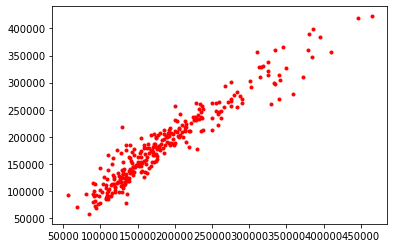

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df.join(dummies), y, test_size=0.2, random_state=14) 
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test) 
plt.scatter(y_test,predictions, color='r', marker='.');

In [99]:
print('The R^2 value for the MLR model is',lm.score(X_test,y_test))

The R^2 value for the MLR model is 0.9131734298065365


In [100]:
print('Adjusted R^2 :', 1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R^2 : 0.9020677057120237


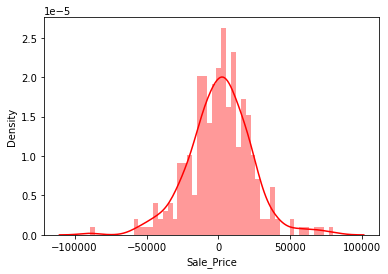

In [101]:
sns.distplot((y_test-predictions),bins=50, color='r');

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 16376.123523749238
MSE: 476693916.244655
RMSE: 21833.3212371516


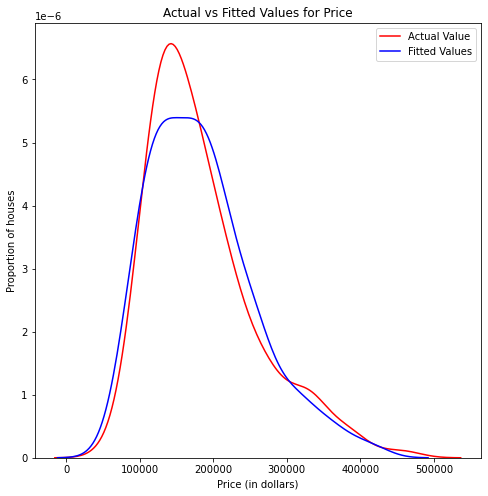

In [103]:
plt.figure(figsize=(8, 8))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of houses')
plt.legend()
plt.show()
plt.close()


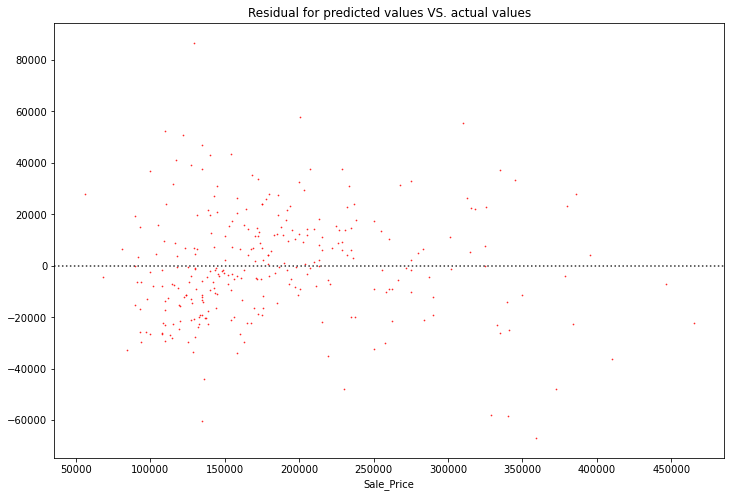

In [104]:
plt.figure(figsize=(12,8))
sns.residplot(y_test,predictions ,color='r', scatter_kws={'s':0.5})
plt.title('Residual for predicted values VS. actual values')
plt.show()

### No trends or patterns observed in the residuals.

# The final R2 score of the MLR model is 91.3% with Adjusted R2 of 90.1% and RMSE: 21818

## Model 2 using lower P values features

In [105]:
XMod2 = X[['Second_Floor_Area','BsmtFinSF1','BsmtUnfSF',
 'Grade_Living_Area','Total_Basement_Area','First_Floor_Area',
 'Age','Garage_Age','Years_After_Remodelling','Lot_Extent',
 'Brick_Veneer_Area', 'Fireplaces','Half_Bathroom_Above_Grade', 
 'Underground_Full_Bathroom', 'Overall_Material']]

In [106]:
scaler2 = StandardScaler()
X_scaled_m2= scaler2.fit_transform(XMod2)

In [107]:
X_scaled_df2= pd.DataFrame(X_scaled_m2, index=XMod2.index, columns=XMod2.columns)

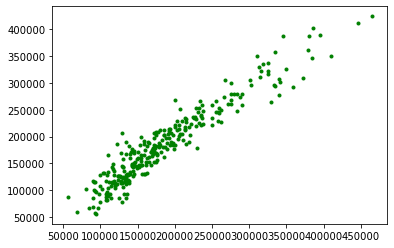

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df2.join(dummies), y, test_size=0.2, random_state=14) 
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test) 
plt.scatter(y_test,predictions, color='g', marker='.');

In [109]:
print('The R^2 value for the MLR model is',lm.score(X_test,y_test))

The R^2 value for the MLR model is 0.9056729379339182


In [110]:
print('Adjusted R^2 :', 1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R^2 : 0.8936078485998845


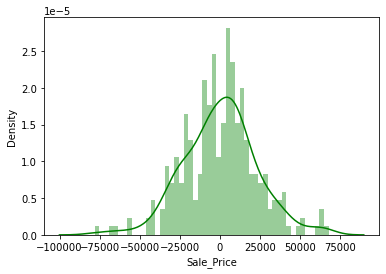

In [120]:
sns.distplot((y_test-predictions),bins=50, color='g');

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17577.366920087545
MSE: 517873002.7449385
RMSE: 22756.823212938543


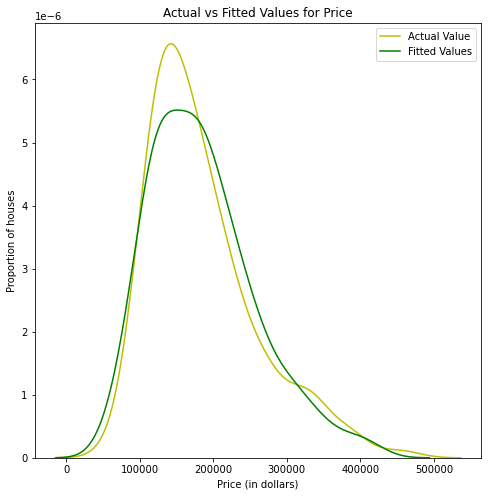

In [118]:
plt.figure(figsize=(8, 8))


ax1 = sns.distplot(y_test, hist=False, color="y", label="Actual Value")
sns.distplot(predictions, hist=False, color="g", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of houses')
plt.legend()
plt.show()
plt.close()

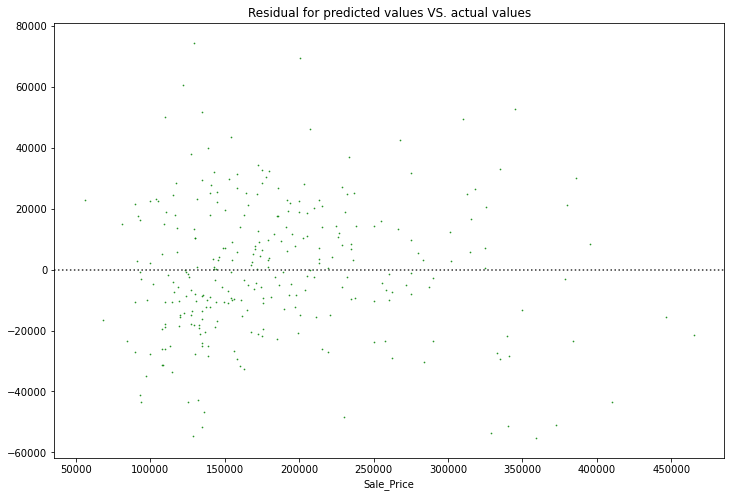

In [119]:
plt.figure(figsize=(12,8))
sns.residplot(y_test,predictions ,color='g', scatter_kws={'s':0.5})
plt.title('Residual for predicted values VS. actual values')
plt.show()

# The final R2 score of the MLR model 2 using features with lower P values is 90.56% with Adjusted R2 of 89.3% and RMSE: 22756